<a href="https://colab.research.google.com/github/rishi-29-02/Lung-Cancer-Prediction/blob/main/Lung_Cancer_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lung Cancer Prediction

## Import libraries

In [407]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [408]:
#from google.colab import files
#uploaded = files.upload()

In [409]:
data = pd.read_excel('datasets.xlsx')
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


## Data Exploration

In [410]:
data.shape

(1000, 25)

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [412]:
data.describe(include='all')

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,P586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
mean,NaN,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,NaN
std,NaN,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,NaN
min,NaN,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN
50%,NaN,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,NaN
75%,NaN,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,NaN


## Dropping the Patient ID Feature.

 Patient Id feature id of no realtion with the disearse level and therfore dropping it.

In [413]:
data.drop(columns=['Patient Id'], axis = 1, inplace=True)
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


## Level feature mapping

In [414]:
data['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [415]:
level_mapping = {'Low':1, 'Medium':2, 'High':3}
data.Level = data['Level'].map(level_mapping)
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,3


## Data Visulaization

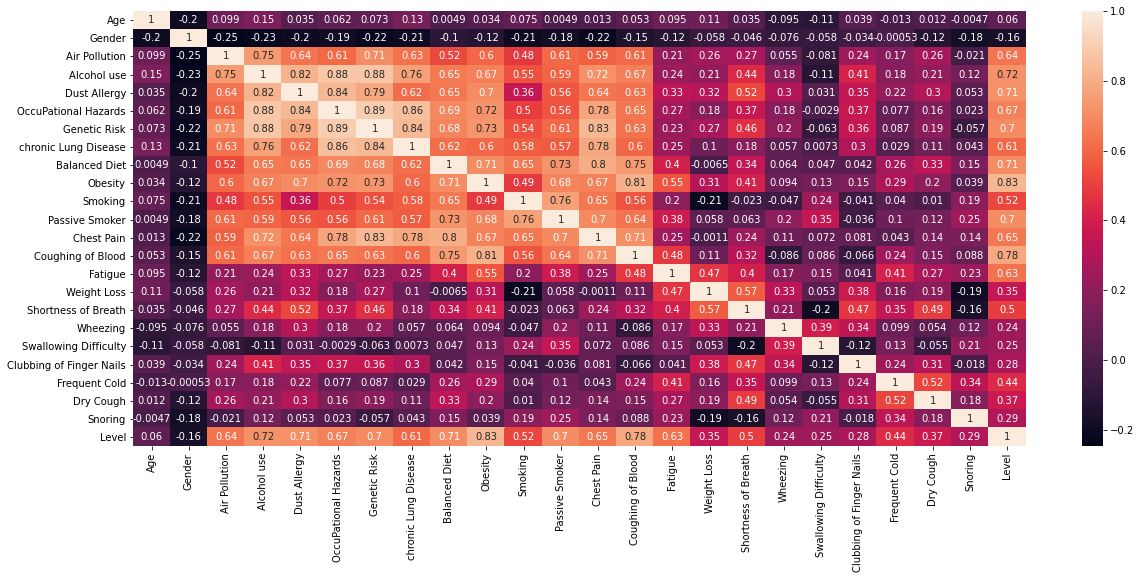

In [416]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Seprating the data into inputs and outputs.

In [417]:
array = data.values
X = array[:, 0:23]
Y = array[:, 23]

## Univariate Feature Selection  

In [418]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, Y)
# summarize scores

print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 44.1872019    4.66816478 518.63153298 781.90984132 401.04088307
 415.68565443 488.6497259  302.39615669 588.9337429  712.08756223
 671.00625311 752.95979136 524.48952111 818.66888369 518.90044626
 206.66656281 330.88070877 201.4261893  113.07424926 257.90767922
 192.71327574 152.02954698  91.7481552 ]
[[2 4 3 2 4 3 2 2 4 3]
 [3 1 4 2 2 2 4 2 3 1]
 [4 5 5 6 7 2 3 4 8 8]
 [7 7 6 7 7 7 7 7 8 4]
 [6 8 7 7 7 8 7 7 9 3]]


## Building our model

1. Logistic Regression

In [419]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.33, random_state=0)

In [420]:
Model1 = LogisticRegression()
Model1.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [421]:
score = Model1.score(x_test, y_test)
score

0.9393939393939394

In [422]:
predictions1 = Model1.predict(x_test)

In [423]:
from sklearn.metrics import mean_absolute_error

mse = mean_absolute_error(y_test, predictions1)
mse

0.06060606060606061

Classification Report for Logistic regression

In [424]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           1       0.95      0.87      0.91       113
           2       0.86      0.95      0.91       101
           3       1.00      1.00      1.00       116

    accuracy                           0.94       330
   macro avg       0.94      0.94      0.94       330
weighted avg       0.94      0.94      0.94       330



Using Kfold ross validation

In [425]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(Model1, x_train, y_train, scoring=scoring, cv=kfold)
msg = '%f (%f)'%(cv_results.mean(), cv_results.std())
print(msg)

0.931343 (0.031450)


2. SVM (support vector Machine)

In [426]:
from sklearn.svm import SVC

Model2 = SVC(kernel='linear')
Model2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [427]:
Model2.score(x_test, y_test)

0.9545454545454546

In [428]:
predictions2 = Model2.predict(x_test)

In [429]:
# mean absolute error
mean_absolute_error(y_test, predictions2)

0.045454545454545456

 Using KFold

In [430]:
kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(Model2, x_train, y_train, scoring=scoring, cv=kfold)
msg = '%f (%f)'%(cv_results.mean(), cv_results.std())
print(msg)

0.934328 (0.026866)


Classification report for SVM

In [431]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           1       1.00      0.87      0.93       113
           2       0.87      1.00      0.93       101
           3       1.00      1.00      1.00       116

    accuracy                           0.95       330
   macro avg       0.96      0.96      0.95       330
weighted avg       0.96      0.95      0.95       330

